**Montamos la unidad Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Leemos el IMDB Dataset of 50K Movie Reviews**

In [1]:
import pandas as pd , numpy as np

#imdb = pd.read_csv('IMDB.csv')
imdb = pd.read_csv('/content/drive/MyDrive/IMDB.csv')


**Mostramos algunas estadísticas y características del corpus**

In [2]:
imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [3]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
imdb['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
imdb['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

**Contamos el número de palabras por review**

In [6]:
def number_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [7]:
imdb['word_count'] = imdb['review'].apply(number_of_words)
imdb.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


**Mostramos el histograma de número de palabras por clase**

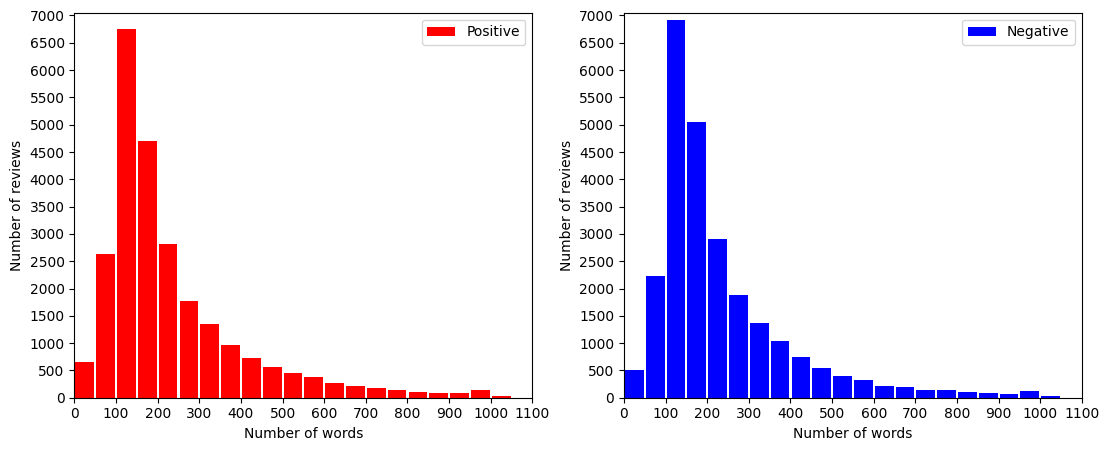

In [8]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(13,5))
bins_edges=np.arange(0, 1100, step=50)
word_count_positive=imdb[imdb['sentiment']=='positive']['word_count']
ax[0].set_xticks(np.arange(0, 1200, step=100)) 
ax[0].set_yticks(np.arange(0, 7100, step=500))
ax[0].hist(word_count_positive,bins=bins_edges,label='Positive',color='red',rwidth=0.9)
ax[0].set_xlabel('Number of words')
ax[0].set_ylabel('Number of reviews')
ax[0].set_xlim([0, 1100])
ax[0].set_ylim([0, 7050])
ax[0].legend(loc='upper right')
word_count_negative=imdb[imdb['sentiment']=='negative']['word_count']
ax[1].set_xticks(np.arange(0, 1200, step=100))
ax[1].set_yticks(np.arange(0, 7100, step=500))
ax[1].hist(word_count_negative,bins=bins_edges,label='Negative',color='blue',rwidth=0.9)
ax[1].set_xlabel('Number of words')
ax[1].set_ylabel('Number of reviews')
ax[1].set_xlim([0, 1100])
ax[1].set_ylim([0, 7050])
ax[1].legend(loc='upper right')
plt.show()

**Pre-procesamos el corpus**

**1. Cambiamos a minúsculas**

In [9]:
imdb['review'] = imdb['review'].str.lower()
imdb['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

**2. Eliminamos marcas HTML**

In [10]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [11]:
imdb['review'] = imdb['review'].apply(remove_html_tags)

**3. Eliminamos URLs**

In [12]:
def remove_urls(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [13]:
imdb['review'] = imdb['review'].apply(remove_urls)

**4. Eliminamos signos de puntuación**

In [14]:
import string
string.punctuation



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
exclude = string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [16]:
imdb['review'] = imdb['review'].apply(remove_punc)

**5. Transformamos abreviaturas a palabras**

In [17]:
chat_words = {'SK8' : 'Skate',
            'STATS' : 'Your sex and age',
'ASL':'Age, Sex, Location',
'THX':'Thank You',
'TTFN': 'Ta-Ta For Now!',
'TTYL':'Talk To You Later',
'U': 'You',
'U2': 'You Too'}

In [18]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return ' '.join(new_text)

In [19]:
imdb['review'] = imdb['review'].apply(chat_conversion)

**6. Eliminamos palabras funcionales (stop words)**

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
print(stop)

{'once', 'any', 'down', 'that', 'over', 'very', 'about', 'too', 'above', 'am', 'being', 'out', "hadn't", 'off', 'themselves', 'm', 'which', "shan't", "should've", 'll', 'hers', 'or', 'i', 'with', 'its', 'both', 'there', 'here', 'ma', 'because', 'other', "wasn't", 'at', 'she', 'we', 'same', 'needn', 'nor', 'my', 'under', 'aren', 'by', 'in', 'own', "don't", 'whom', 'should', 'itself', "doesn't", 'where', 'against', "you're", 'weren', "isn't", 'it', 'few', 'can', 'who', 'some', 'wasn', 'only', 'during', 'just', 'after', 'so', 'to', 'ourselves', 'they', 'their', 'herself', 'do', "you'd", "needn't", 'again', 'was', 'haven', 'through', 'have', 'you', 'our', 'him', 'is', "aren't", "mustn't", 't', 'hasn', 'been', 'has', 'he', 'no', 'did', 'these', "mightn't", 'were', 'below', 'most', 'shan', 'up', 'ours', 'be', "wouldn't", 'his', 'this', 'theirs', 'not', 's', 'don', 'your', 'yourself', 'will', 'shouldn', 're', 'before', 'myself', 'but', 'until', 'of', 'from', 'had', 'couldn', 'if', "weren't", 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/josanna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
imdb['review']=imdb['review'].apply(remove_stopwords)

**7. Lematización**

In [22]:
from nltk.stem.porter import PorterStemmer
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb['review']=imdb['review'].apply(simple_stemmer)

In [23]:
imdb['new_word_count'] = imdb['review'].apply(number_of_words)
imdb.head()

,review,sentiment,word_count,new_word_count
0,one review mention watch 1 oz episod youll hoo...,positive,307,168
1,wonder littl product film techniqu unassum old...,positive,162,84
2,thought wonder way spend time hot summer weeke...,positive,166,86
3,basic there famili littl boy jake think there ...,negative,138,67
4,petter mattei love time money visual stun film...,positive,230,125


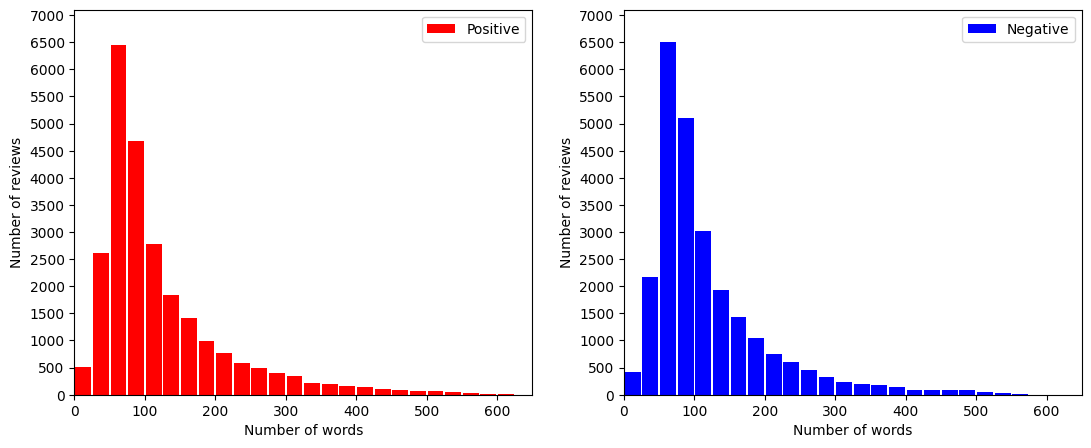

In [24]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(13,5))
word_count_positive=imdb[imdb['sentiment']=='positive']['new_word_count']
bins_edges=np.arange(0, 650, step=25)
ax[0].set_xticks(np.arange(0, 650, step=100)) 
ax[0].set_yticks(np.arange(0, 7100, step=500))
ax[0].hist(word_count_positive,bins=bins_edges,label='Positive',color='red',rwidth=0.9)
ax[0].set_xlabel('Number of words')
ax[0].set_ylabel('Number of reviews')
ax[0].set_xlim([0, 650])
ax[0].set_ylim([0, 7100])
ax[0].legend(loc='upper right')
word_count_negative=imdb[imdb['sentiment']=='negative']['new_word_count']
ax[1].set_xticks(np.arange(0, 650, step=100))
ax[1].set_yticks(np.arange(0, 7100, step=500))
ax[1].hist(word_count_negative,bins=bins_edges,label='Negative',color='blue',rwidth=0.9)
ax[1].set_xlabel('Number of words')
ax[1].set_ylabel('Number of reviews')
ax[1].set_xlim([0, 650])
ax[1].set_ylim([0, 7100])
ax[1].legend(loc='upper right')
plt.show()

**Guardamos el resultado del preproceso**

In [25]:
imdb_norm=pd.DataFrame(imdb)
#imdb_norm.to_csv('IMDB_prepro.csv', index=False)
imdb_norm.to_csv('/content/drive/MyDrive/IMDB_prepro.csv', index=False)